In [1]:
import pandas as pd

In [2]:
!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Untitled Folder\AAPL_data.csv")

In [5]:
df.head

<bound method NDFrame.head of             date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]>

In [6]:
df2=df.reset_index()["close"]

In [7]:
df2

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

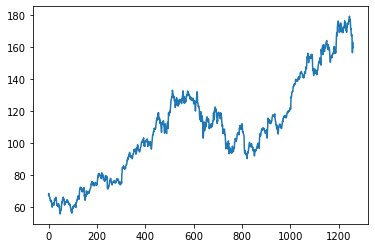

In [8]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [11]:
df.shape

(1259, 7)

In [12]:
df2

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.81558288],
       [0.86855117],
       [0.84028522]])

In [13]:
#lets split the data into train and test
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data,test_data= df2[0:training_size,:],df2[training_size:len(df2),:1]

In [14]:
training_size,test_size

(818, 441)

In [15]:
# converting an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 30s 463ms/step - loss: 0.0427 - val_loss: 0.0558
Epoch 2/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 3/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0035 - val_loss: 0.0127
Epoch 4/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 5/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 8/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 9/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0012 - val_l

In [23]:
import tensorflow as tf

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102.29490390585865

In [27]:
math.sqrt(mean_squared_error(ytest,test_predict))

145.5714271610192

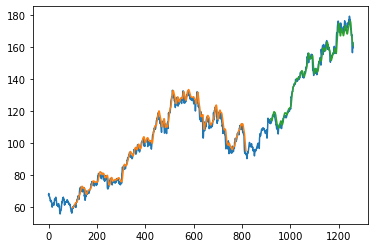

In [28]:
#shifting train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
#shifting test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [29]:
len(test_data)

441

In [30]:
x_input = test_data[341: ].reshape(1,-1)

In [31]:
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
    
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.83227277]
101
1 day input [0.83323898 0.83372493 0.81218125 0.79047559 0.7783269  0.76747407
 0.78845081 0.79727886 0.78958468 0.79638795 0.79387722 0.79930364
 0.79120451 0.80667384 0.80594492 0.81031845 0.8108044  0.81606883
 0.81161431 0.81963245 0.84303892 0.84781741 0.84206703 0.81145233
 0.81363909 0.81299116 0.82052335 0.81493495 0.82303408 0.86871315
 0.89843695 0.91722692 0.8998138  0.90969474 0.9452499  0.95942337
 0.96395889 0.97554064 0.97262495 0.96282501 0.95715562 0.93585492
 0.91755089 0.93391113 0.92621695 0.9248401  0.95043334 0.96517375
 0.96525475 0.95812751 0.9498664  0.92079054 0.93998547 0.93350617
 0.92338226 0.9220864  0.91698395 0.91949468 0.91989964 0.94662675
 0.9387706  0.9433871  0.94298215 0.95715562 0.97699848 0.96177212
 0.96023329 0.96557871 0.96557871 0.92961859 0.92986156 0.93374914
 0.91876576 0.94330611 0.94306314 0.94954244 0.96549772 0.96023329
 0.9600713  0.95974734 0.96776548 0.98242489 0.97513568 0.99870414
 1.         0.9935207  0.98169597

In [54]:
new_day = np.arange(1,101)
pred_day = np.arange(101,131)


In [56]:
import matplotlib.pyplot as plt

In [57]:
len(df2)

1259

In [58]:
df3 = df2.tolist()

In [59]:
df3.extend(lst_output)

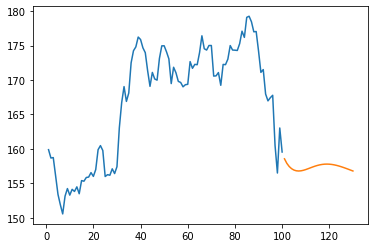

In [60]:
plt.plot(new_day,scaler.inverse_transform(df2[1159:]))
plt.plot(pred_day,scaler.inverse_transform(lst_output))

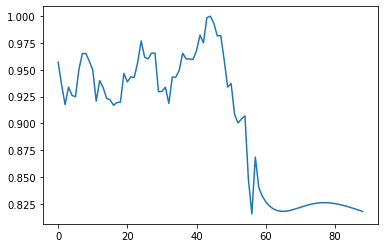

In [61]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])